In [1]:
# Import the required libraries
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

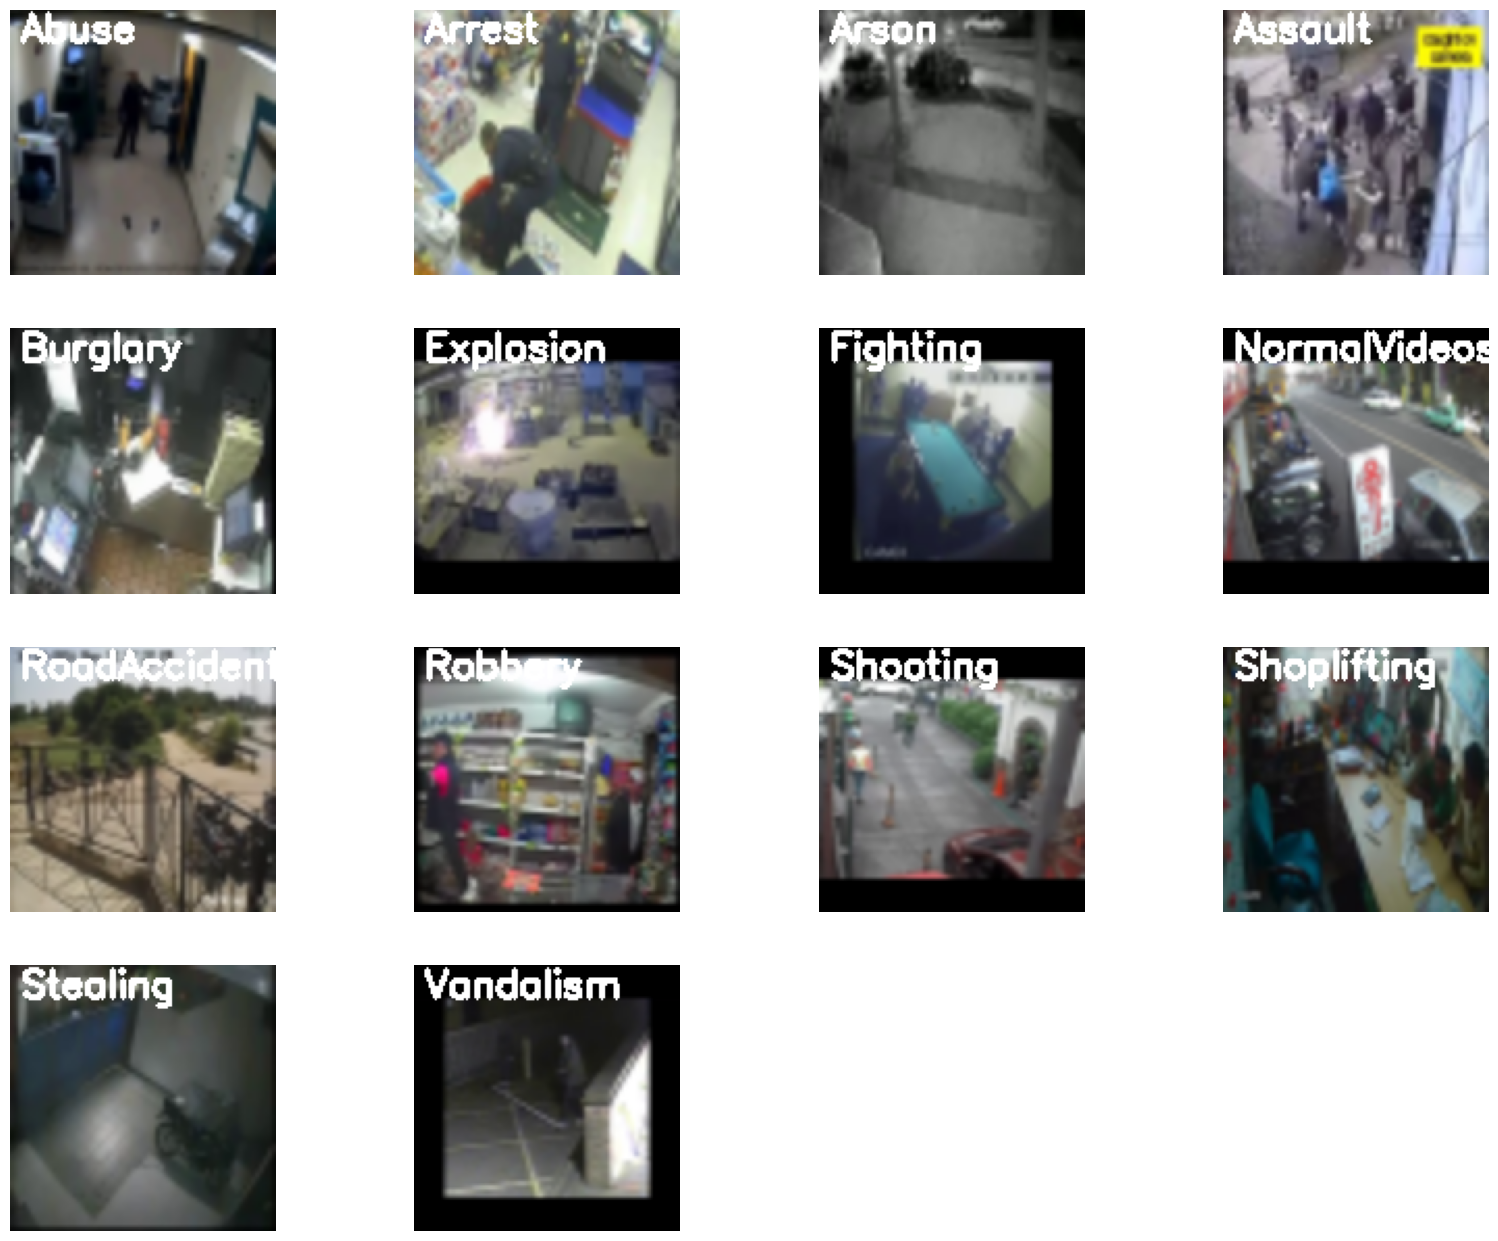

In [2]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
classes = os.listdir('UCF Crime Dataset')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
# random_range = random.sample(range(len(classes)), 20)

# Iterating through all the generated random values.
for counter, index in enumerate(range(len(classes)), 1):
    
    # Retrieve a Class Name using the Random Index.
    selected_class_Name = classes[index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files = os.listdir(f'UCF Crime Dataset/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file = random.choice(video_files)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'UCF Crime Dataset/{selected_class_Name}/{selected_video_file}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    
    # Upscaling the images for better visualization
    resized_frame = cv2.resize(rgb_frame, (128,128))

    # Write the class name on the video frame.
    cv2.putText(resized_frame, selected_class_Name, (5, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(resized_frame);plt.axis('off')